In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/drive/My\ Drive/Learn/* ./
!ls


import pandas as pd
X = pd.read_csv("WH_train Data.csv")
y = pd.read_csv("WH_train labels.csv")
df = pd.read_csv("WH_test Data.csv")
pd.set_option('display.max_rows', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 drive					  Social_Network_Ads.csv
 Project_1.ipynb			  Useful_mess.ipynb
 Project_2.ipynb			 'WH_test Data.csv'
 sample_data				 'WH_train Data.csv'
 Scikit-learn_algorithm_cheat_sheet.png  'WH_train labels.csv'


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (329,331,333,336,338,344,345,346,348,354,355,356,357,358,361,362,364,367,372,377,380,383,385,387,390,392,399,400,406,408,409,413,416,418,419,431,433,437,438,442,448,449,450,453,457,464,473,478,479,481,483,485,486,489,492,495,496,497,498,499,500,503,507,508,510,511,514,515,517,519,520,521,522,523,524,526,527,530,534,537,538,539,541,544,547,548,549,550,551,557,558,560,564,569,572,573,576,577,579,583,596,597,598,600,601,602,604,605,606,608,609,613,619,620,625,627,628,629,631,632,633,636,641,642,643,645,646,647,648,651,655,661,662,665,668,675,676,679,682,685,687,689,690,691,694,698,701,702,703,706,711,712,713,719,720,721,733,735,737,738,742,746,747,748,749,752,754,755,760,764,768,770,781,782,789,797,807,812,814,817,818,822,823,824,825,832,840,843,844,845,850,853,857,858,861,867,868,873,874,876,877,879,880,881,883,886,890,893,897,899,900,901,902,904,905,908,909,910,912,913,914,915,916,922,923

**Visualize the data, your model will only be as good as the data you feed it.**

In [0]:
X.head()

,id,release,n_0000,n_0001,n_0002,n_0003,n_0004,n_0005,n_0006,n_0007,n_0008,n_0009,n_0010,n_0011,n_0012,n_0013,n_0014,n_0015,n_0016,n_0017,n_0018,n_0019,n_0020,n_0021,n_0022,n_0023,n_0024,n_0025,n_0026,n_0027,n_0028,n_0029,n_0030,n_0031,n_0032,n_0033,n_0034,n_0035,n_0036,n_0037,...,c_1338,c_1339,c_1340,c_1341,c_1342,c_1343,c_1344,c_1345,c_1346,c_1347,c_1348,c_1349,c_1350,c_1351,c_1352,c_1353,c_1354,c_1355,c_1356,c_1357,c_1358,c_1359,c_1360,c_1361,c_1362,c_1363,c_1364,c_1365,c_1366,c_1367,c_1368,c_1369,c_1370,c_1371,c_1372,c_1373,c_1374,c_1375,c_1376,c_1377
0,11193,a,NaN,NaN,0.025449,NaN,NaN,0.368421,NaN,NaN,NaN,NaN,NaN,NaN,0.292683,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223881,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,b,NaN,NaN,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e,NaN,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN,q,NaN,NaN,NaN
1,11382,a,NaN,NaN,0.031297,NaN,NaN,0.315789,NaN,NaN,NaN,NaN,NaN,NaN,0.243902,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.472727,NaN,NaN,NaN,NaN,0.104478,0.125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,b,NaN,j,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e,NaN,b,NaN,b,NaN,NaN,NaN,NaN,a,NaN,a,NaN,NaN,NaN,NaN,NaN
2,16531,a,NaN,NaN,0.024475,NaN,NaN,0.342105,NaN,NaN,NaN,NaN,NaN,NaN,0.304878,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.527273,NaN,NaN,NaN,NaN,0.119403,0.250,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN,a,NaN,b,NaN,NaN,NaN
3,1896,a,NaN,NaN,0.041694,NaN,NaN,0.447368,NaN,NaN,NaN,NaN,NaN,NaN,0.207317,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149254,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,a,NaN,j,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,g,NaN,a,NaN,b,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN
4,18262,c,NaN,NaN,0.038120,NaN,NaN,0.315789,NaN,NaN,NaN,NaN,NaN,NaN,0.219512,NaN,NaN,NaN,NaN,0.388889,NaN,0.0,NaN,0.666667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.072727,NaN,NaN,NaN,NaN,0.074627,NaN,NaN,0.0025,...,NaN,NaN,NaN,a,NaN,b,NaN,j,NaN,d,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e,NaN,b,b,b,NaN,NaN,NaN,NaN,b,NaN,a,NaN,a,NaN,NaN,NaN


In [0]:
print(X.shape)

(14644, 1379)


**We have a very large dataset relative to the compute power of my machine. There looks like a large volume of missing values. ID is irrelevant and used as an instance marker.**

In [0]:
X = X.drop('id',axis=1)

In [0]:
for i in X.columns:
  print(X[i].unique())

['a' 'c' 'b']
[       nan 0.30769231 0.07692308 0.15384615 0.46153846 0.61538462
 0.84615385 0.         0.38461538 0.53846154 0.23076923 0.92307692
 0.76923077]
[       nan 0.80952381 0.45238095 0.30952381 0.33333333 0.78571429
 0.38095238 0.9047619  0.76190476 0.54761905 0.4047619  0.5952381
 0.5        0.57142857 0.97619048 0.47619048 0.88095238 0.35714286
 0.66666667 0.92857143 0.85714286 0.64285714 0.83333333 0.04761905
 0.61904762 0.95238095 0.71428571 0.69047619 0.73809524 0.42857143
 0.23809524 0.28571429 0.26190476 0.52380952 1.         0.
 0.21428571 0.19047619]
[0.02544943 0.03129738 0.02447477 0.04169374 0.03811999 0.03941954
 0.05014078 0.04916613 0.05024908 0.04949101 0.01613602 0.01927659
 0.02003465 0.03411306 0.02577431 0.03963613 0.02209227        nan
 0.05436431 0.03952783 0.05512237 0.03064761 0.04320988 0.04093567
 0.02739874 0.03400476 0.03043102 0.04938272 0.03476283 0.05144033
 0.05360624 0.05317306 0.04353476 0.02642408 0.03021442 0.06205328
 0.04678363 0.012778

**The float values look like they have already been scaled with a minMax scaler.and there also looks to be some rows that have very little information gain.**

In [0]:
for x in range(1,4):
  for i in X.columns:
    if len(X[i].unique()) <= x:
      print(X[i].unique())

[1]
[1]
[1]
[1]
[1]
[1]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[1]
[1]
[1]
[1]
[1]
[1]
[nan]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan 'a']
[nan 'b']
[nan 'a']
[nan 'a']
[nan 'b']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan]
[nan 'a']
[nan 'a']
[nan 'a']
[nan]
[nan 'a']
[nan]
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'b']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'b']
[nan]
[nan 'a']
['a' 'b']
[nan 'a']
[nan 'a']
[nan]
[nan 'a']
[nan]
[nan 'a']
[nan 'a']
['a' 'b']
[nan]
[nan 'a']
[nan 'a']
['b' 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan]
[nan 'a']
[nan 'a']
[nan 'a']
[nan 'a']
[nan

**In my opinion the best way to deal with missing values is to 'flag' by creating a column to mark that there was a missing value for the instance and 'fill' by picking the best technique to impute data on your dataset. Doing this here would push the already pressing dimensionality farther. You could settle for loss of information and impute with zero, but then bias might arise as well.**

In [0]:
y.head()

,id,service_a,service_b,service_c,service_d,service_e,service_f,service_g,service_h,service_i,service_j,service_k,service_l,service_m,service_n
0,11193,1,1,0,0,0,0,0,0,0,1,1,0,0,0
1,11382,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,16531,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,1896,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,18262,0,0,0,1,1,0,0,0,0,0,1,1,1,0


In [0]:
print(y.shape)

(14644, 15)


**We have a multi-label classification problem as well. It looks like the labels are in binary relevance. This is good because if we were going to run a model on it then we could apply the common classification models on each label. We can also apply classifier chains and adapted models for multi-label datasets**

**Imbalance is common in multi-label datasets, lets visualize this**

0    7735
1    6909
Name: service_a, dtype: int64

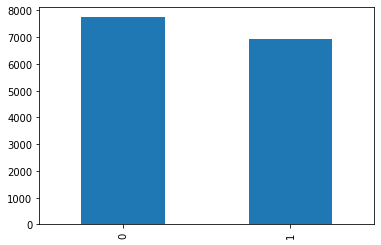

In [0]:
pd.value_counts(y['service_a']).plot.bar()
y.service_a.value_counts()

0    9792
1    4852
Name: service_b, dtype: int64

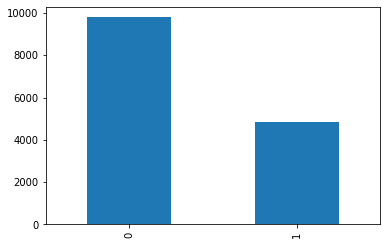

In [0]:
pd.value_counts(y['service_b']).plot.bar()
y.service_b.value_counts()

0    10776
1     3868
Name: service_c, dtype: int64

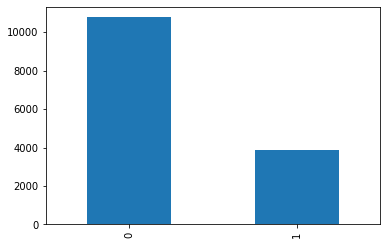

In [0]:
pd.value_counts(y['service_c']).plot.bar()
y.service_c.value_counts()

0    14419
1      225
Name: service_d, dtype: int64

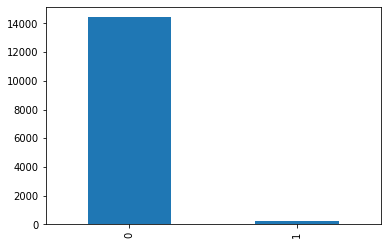

In [0]:
pd.value_counts(y['service_d']).plot.bar()
y.service_d.value_counts()

0    13899
1      745
Name: service_e, dtype: int64

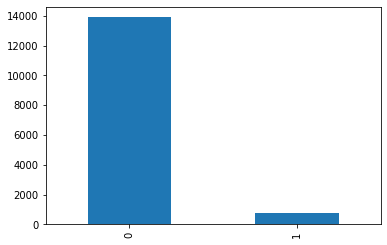

In [0]:
pd.value_counts(y['service_e']).plot.bar()
y.service_e.value_counts()

0    14216
1      428
Name: service_f, dtype: int64

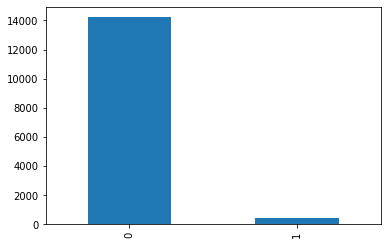

In [0]:
pd.value_counts(y['service_f']).plot.bar()
y.service_f.value_counts()

0    13880
1      764
Name: service_g, dtype: int64

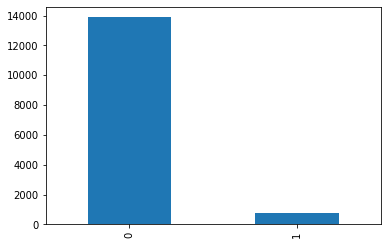

In [0]:
pd.value_counts(y['service_g']).plot.bar()
y.service_g.value_counts()

0    10278
1     4366
Name: service_h, dtype: int64

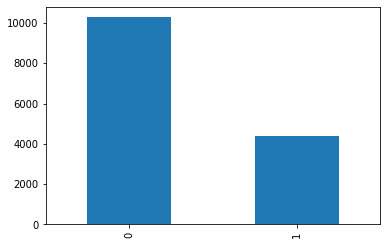

In [0]:
pd.value_counts(y['service_h']).plot.bar()
y.service_h.value_counts()

0    14402
1      242
Name: service_i, dtype: int64

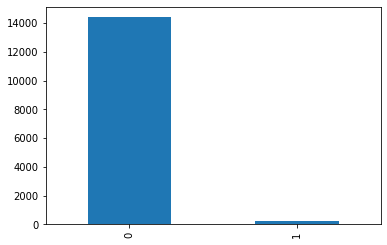

In [0]:
pd.value_counts(y['service_i']).plot.bar()
y.service_i.value_counts()

1    12445
0     2199
Name: service_j, dtype: int64

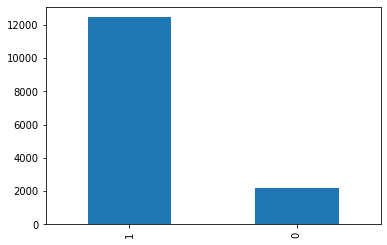

In [0]:
pd.value_counts(y['service_j']).plot.bar()
y.service_j.value_counts()

1    11409
0     3235
Name: service_k, dtype: int64

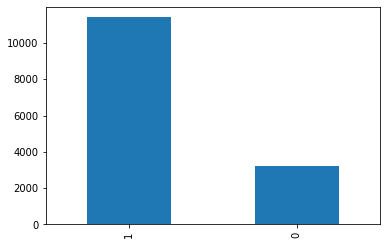

In [0]:
pd.value_counts(y['service_k']).plot.bar()
y.service_k.value_counts()

0    13078
1     1566
Name: service_l, dtype: int64

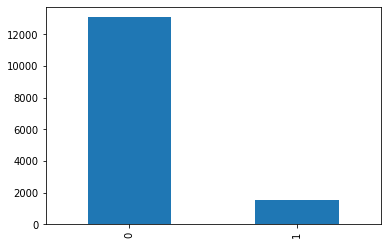

In [0]:
pd.value_counts(y['service_l']).plot.bar()
y.service_l.value_counts()

0    13346
1     1298
Name: service_m, dtype: int64

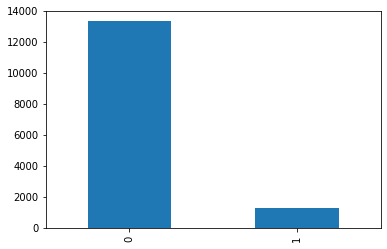

In [0]:
pd.value_counts(y['service_m']).plot.bar()
y.service_m.value_counts()

0    12032
1     2612
Name: service_n, dtype: int64

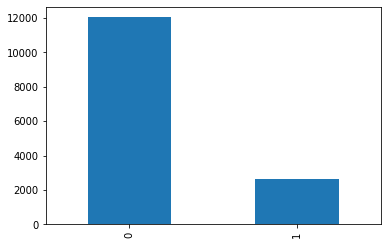

In [0]:
pd.value_counts(y['service_n']).plot.bar()
y.service_n.value_counts()

**We can oversample, undersample or synthetic sample to make up for the imbalance. All have ups and downs. Random forest might be a good algorithm to apply as long as it is balanced. The allure of a classifier chain is that it can take in the previous models prediction and therefore take into consideration the correlation between labels.**

In [0]:
y = y.drop('id',axis=1)

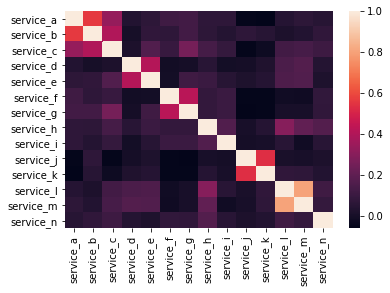

In [0]:
import seaborn as sns

map = sns.heatmap(y.corr())